<a href="https://colab.research.google.com/github/Radhesh-Sarma/Emotion-Detection/blob/main/GA_new_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import sklearn.svm
import numpy
import matplotlib.pyplot
import random
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import pandas as pd
from sklearn import model_selection

Mounted at /content/gdrive


In [2]:
def reduce_features(solution, features):
    selected_elements_indices = numpy.where(solution == 1)[0]
    reduced_features = features[:, selected_elements_indices]
    return reduced_features


def classification_accuracy(labels, predictions):
    correct = numpy.where(labels == predictions)[0]
    accuracy = correct.shape[0]/labels.shape[0]
    return accuracy


def cal_pop_fitness(pop, features, labels, train_indices, test_indices):
    accuracies = numpy.zeros(pop.shape[0])
    idx = 0

    for curr_solution in pop:
        reduced_features = reduce_features(curr_solution, features)
        train_data = reduced_features[train_indices, :]
        test_data = reduced_features[test_indices, :]

        train_labels = labels[train_indices]
        test_labels = labels[test_indices]

        SV_classifier = sklearn.svm.SVC(gamma='scale')
        SV_classifier.fit(X=train_data, y=train_labels)

        predictions = SV_classifier.predict(test_data)
        accuracies[idx] = classification_accuracy(test_labels, predictions)
        idx = idx + 1
    return accuracies

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents


def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring


def mutation(offspring_crossover, num_mutations=2):
    mutation_idx = numpy.random.randint(low=0, high=offspring_crossover.shape[1], size=num_mutations)
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        offspring_crossover[idx, mutation_idx] = 1 - offspring_crossover[idx, mutation_idx]
    return offspring_crossover

In [3]:
def normalize(dataset):
    dataNorm=((dataset-dataset.mean())/(dataset.std()))
    dataNorm["Sad?"]=dataset["Sad?"]
    return dataNorm

In [4]:
df = pd.read_csv('gdrive/My Drive/combined.csv')
df=df.drop(['face'],1)
df=df.drop(['Unnamed: 1'],1)
print(df)
  
df = normalize(df)
#df=df.drop('Unnamed: 1',axis=1,inplace=True)

x = np.array(df.drop(['Sad?'],1))
y = np.array(df['Sad?'])
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.2)

data_inputs = x_train
data_outputs = y_train

     Sad?  confidence  gaze_0_x  gaze_0_y  ...  AU25_c  AU26_c  AU28_c  AU45_c
0       1       0.975  0.045100  0.261753  ...     0.0     0.0     1.0     0.0
1       1       0.925  0.058224  0.235082  ...     0.0     0.0     0.0     0.0
2       1       0.975  0.074234  0.026665  ...     0.0     0.0     0.0     0.0
3       1       0.025  0.256086 -0.216004  ...     1.0     0.0     1.0     0.0
4       1       0.975  0.193449  0.209023  ...     0.0     0.0     1.0     0.0
..    ...         ...       ...       ...  ...     ...     ...     ...     ...
121     0       0.875 -0.263258 -0.049040  ...     1.0     0.0     1.0     1.0
122     0       0.775  0.509802 -0.322897  ...     0.0     0.0     1.0     0.0
123     0       0.975  0.183691  0.158997  ...     1.0     1.0     0.0     0.0
124     0       0.975 -0.010093  0.216590  ...     0.0     0.0     1.0     0.0
125     0       0.975  0.145005  0.166456  ...     1.0     0.0     0.0     0.0

[126 rows x 711 columns]


Number of training samples:  25
Number of test samples:  25
(8, 710)
Generation :  0
Best result :  0.52
Generation :  1
Best result :  0.52
Generation :  2
Best result :  0.52
Generation :  3
Best result :  0.52
Generation :  4
Best result :  0.52
Generation :  5
Best result :  0.52
Generation :  6
Best result :  0.52
Generation :  7
Best result :  0.52
Generation :  8
Best result :  0.52
Generation :  9
Best result :  0.52
Generation :  10
Best result :  0.52
Generation :  11
Best result :  0.52
Generation :  12
Best result :  0.52
Generation :  13
Best result :  0.52
Generation :  14
Best result :  0.52
Generation :  15
Best result :  0.52
Generation :  16
Best result :  0.52
Generation :  17
Best result :  0.52
Generation :  18
Best result :  0.52
Generation :  19
Best result :  0.52
Generation :  20
Best result :  0.52
Generation :  21
Best result :  0.52
Generation :  22
Best result :  0.52
Generation :  23
Best result :  0.52
Generation :  24
Best result :  0.52
Generation :  25

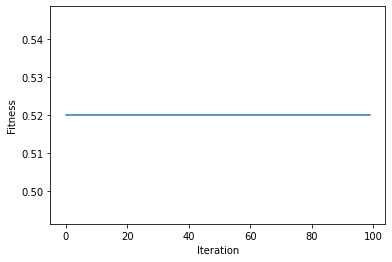

In [7]:
num_samples = data_inputs.shape[0]
num_feature_elements = data_inputs.shape[1]

train_indices = numpy.arange(1, num_samples, 4)
test_indices = numpy.arange(0, num_samples, 4)
print("Number of training samples: ", train_indices.shape[0])
print("Number of test samples: ", test_indices.shape[0])

"""
Genetic algorithm parameters:
    Population size
    Mating pool size
    Number of mutations
"""
sol_per_pop = 8 # Population size.
num_parents_mating = 4 # Number of parents inside the mating pool.
num_mutations = 3 # Number of elements to mutate.

# Defining the population shape.
pop_shape = (sol_per_pop, num_feature_elements)

# Creating the initial population.
new_population = numpy.random.randint(low=0, high=2, size=pop_shape)
print(new_population.shape)

best_outputs = []
num_generations = 100
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)

    best_outputs.append(numpy.max(fitness))
    # The best result in the current iteration.
    print("Best result : ", best_outputs[-1])

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_shape[0]-parents.shape[0], num_feature_elements))

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=num_mutations)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))[0]
best_match_idx = best_match_idx[0]

best_solution = new_population[best_match_idx, :]
best_solution_indices = numpy.where(best_solution == 1)[0]
best_solution_num_elements = best_solution_indices.shape[0]
best_solution_fitness = fitness[best_match_idx]

print("best_match_idx : ", best_match_idx)
print("best_solution : ", best_solution)
print("Selected indices : ", best_solution_indices)
print("Number of selected elements : ", best_solution_num_elements)
print("Best solution fitness : ", best_solution_fitness)

matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()